In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append("..")

from text_recognizer.data.emnist import EMNIST

In [2]:
data = EMNIST()
data.prepare_data()
data.setup()
print(data)

Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...
EMNIST Dataset
Num classes: 83
Mapping: ['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']
Dims: (1, 28, 28)
Train/val/test sizes: 260212, 65054, 53988
Batch x stats: (torch.Size([128, 1, 28, 28]), torch.float32, tensor(0.), tensor(0.1656), tensor(0.3257), tensor(1.))
Batch y stats: (torch.Size([128]), torch.int64, tensor(4), tensor(65))



In [4]:
x, y = next(iter(data.test_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([128, 1, 28, 28]) torch.float32 tensor(0.) tensor(0.2215) tensor(0.3603) tensor(1.)
torch.Size([128]) torch.int64 tensor(4) tensor(4)


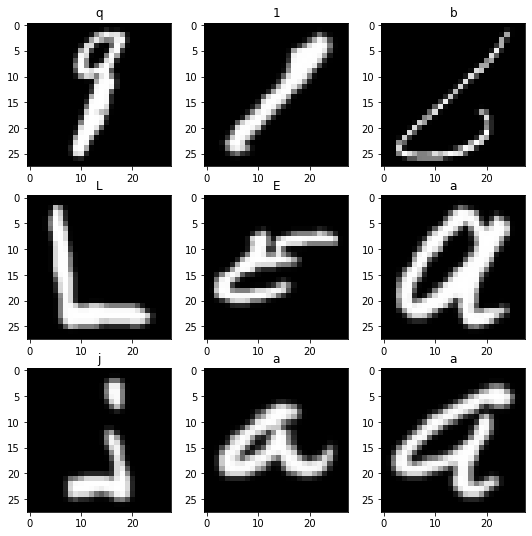

In [6]:
fig=plt.figure(figsize=(9,9))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    rand_i=np.random.randint(len(data.data_test))
    image,label=data.data_test[rand_i]
    ax.imshow(image.reshape(28,28),cmap="gray")
    ax.set_title(data.mapping[label])

In [7]:
import pytorch_lightning as pl
from text_recognizer.models import CNN
from text_recognizer.lit_models import BaseLitModel

model=CNN(data_config=data.config())
lit_model=BaseLitModel(model=model)
trainer=pl.Trainer(gpus=1,max_epochs=5)
trainer.fit(lit_model,datamodule=data)

/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `Accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.classification.accuracy.Accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type     | Params
---------------------------------------
0 | model     | CNN      | 1.7 M 
1 | train_acc | Accuracy | 0     
2 | val_acc   | Accuracy | 0     
3 | test_acc  | Accuracy |

Validation sanity check: 0it [00:00, ?it/s]

/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:106: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-k__ntgwt/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loa

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [9]:
x,y=next(iter(data.test_dataloader()))
logits=model(x)
print(logits.shape)
preds=logits.argmax(-1)
print(y,preds)

torch.Size([128, 83])
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4]) tensor([28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 28,  4,  4,  4,  4,
         4, 28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 28,  4,
        28, 28,  4,  4, 28, 28,  4,  4,  4,  4,  4,  4,  4,  4,  4, 28,  4,  4,
         4, 28, 28,  4,  4, 28,  4, 28,  4, 28,  4, 28, 54, 28,  4,  4, 28,  4,
         4, 28,  4,  4, 28,  4,  4, 28, 28,  4, 28,  4,  4,  4,  4,  4, 28,  4,
         4,  4, 46,  4,  4, 28,  4,  9,  4, 28,  4,  4,  4,  4,  4,  4,  4, 28,
         4, 28,  4,  4, 28,  4, 17, 28,  4,  4,  4,  4,  4,  4,  

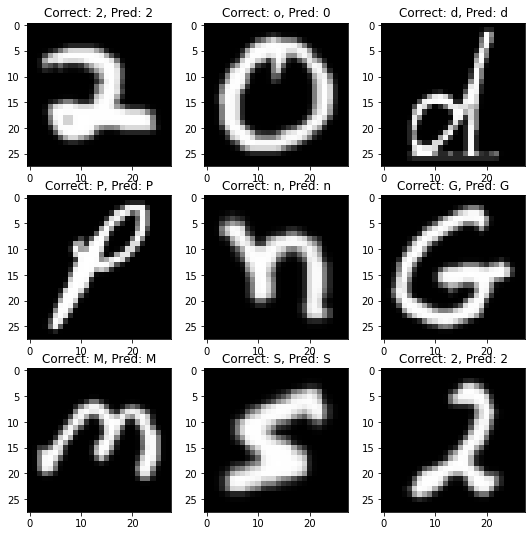

In [11]:
fig=plt.figure(figsize=(9,9))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    rand_i=np.random.randint(len(data.data_test))
    image,label=data.data_test[rand_i]

    image_for_model=image.unsqueeze(0)
    logits=model(image_for_model)
    pred_ind=logits.argmax(-1)
    pred_label=data.mapping[pred_ind]

    ax.imshow(image.reshape(28,28),cmap="gray")
    ax.set_title(f"Correct: {data.mapping[label]}, Pred: {pred_label}")